In [18]:
import sys
sys.path.append('../../')
%matplotlib notebook
from pendulum import sim, controller, viz
import numpy as np
import matplotlib.pyplot as plt

We import the simulation logic from `pendulum.sim`, any built-in controllers as well as the controller base class from `pendulum.controller`, and the visualizations are stored in `pendulum.viz`. 

In [19]:
dt, t_final = 0.01, 5.0

pend = sim.Pendulum(
    2.0,  # Large mass, 2.0 kg
    1.0,  # Small mass, 1.0 kg
    2.0,  # length of arm, 2.0 meter
    initial_state=np.array([0.0, 0.0, 0.1, 0.0]),
)

Every simulation begins at t=0 and runs for some period of time, measured in seconds. Each simulation has a timestep, usually denoted `dt`,which tells us how often the controller's `policy` is implemented. 

A pendulum is created by instantiating a new `Pendulum` class. This class takes three arguments, M, m, and l. So here, we have created a cart with mass 2kg, a pendulum with mass 1kg, and an arm length 2 m. We also pass in an optional `initial_state` which sets ``[x=0, xdot=0, theta=0.1, thetadot=0]``. So, we start off slightly tipped over.

In [20]:
cont = controller.NoController()

We just set the controller to be a basic controller. It will read the state and will do nothing every timestep. We need to provide a controller every time we run the simulation, even if it does nothing like this one. 

In [21]:
simu = sim.Simulation(dt, t_final, lambda t: 0)

We create a simulation, with timestep `dt`, final time `t_final`, and an external force function of `lambda t: 0`, which basically just returns 0 external force for every time value `t`.

In [22]:
results = simu.simulate(pend, cont)

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2167.65it/s]


Calling `simulate` on the simulation object actually runs the simulation. `simulate` takes 2 arguments, a pendulum object and a controller object. The results of the simulation are stored into a dataframe, results.

In [23]:
print(results.columns)

MultiIndex([(         'state',              'x'),
            (         'state',             'xd'),
            (         'state',              't'),
            (         'state',             'td'),
            (        'energy',        'kinetic'),
            (        'energy',      'potential'),
            (        'energy',          'total'),
            (        'forces',         'forces'),
            ('control action', 'control action'),
            (         'state',            'xdd'),
            (         'state',            'tdd'),
            (        'forces',            'pRx'),
            (        'forces',            'pRy'),
            (        'forces',             'pG'),
            (        'forces',            'cRy'),
            (        'forces',            'cRx'),
            (        'forces',             'cG'),
            (        'forces',             'cN')],
           )


So let's see what data we got back. Because there are 4 different states, we have a multi-index with two levels. This allows us to group quantities together to more easily slice and dice the results we get. Often, we see `x`, `xd`, `t`, `td` grouped together as subquantities, because they are our state vectors.

<IPython.core.display.Javascript object>


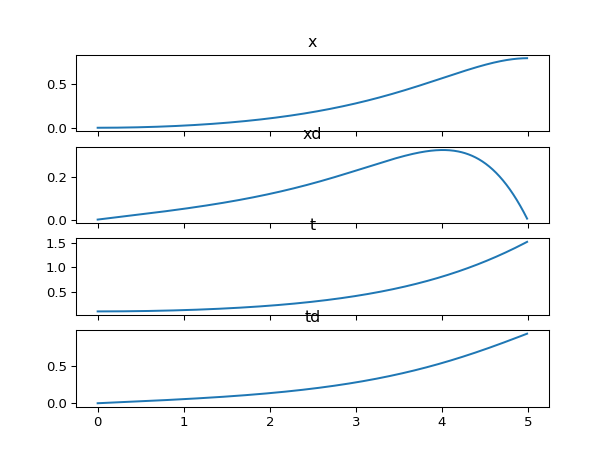

In [24]:
fig, ax = plt.subplots(nrows=4, sharex=True)
state_labels = ["x", "xd", "t", "td"]
for i, s in enumerate(state_labels):
    ax[i].plot(results[("state", s)], label="state")
    ax[i].set_title(s)

We can see some results of the simulation. It looks like our positive initial $\theta$ value caused the pendulum to tip over and just about swing completely back up.

In [25]:
visu = viz.Visualizer(results, pend, speed=1)

We can confirm this by creating a vizualizer using the `Visualizer` class. We instantiate it with the same `pend` object, and the results from our simulation.

<IPython.core.display.Javascript object>


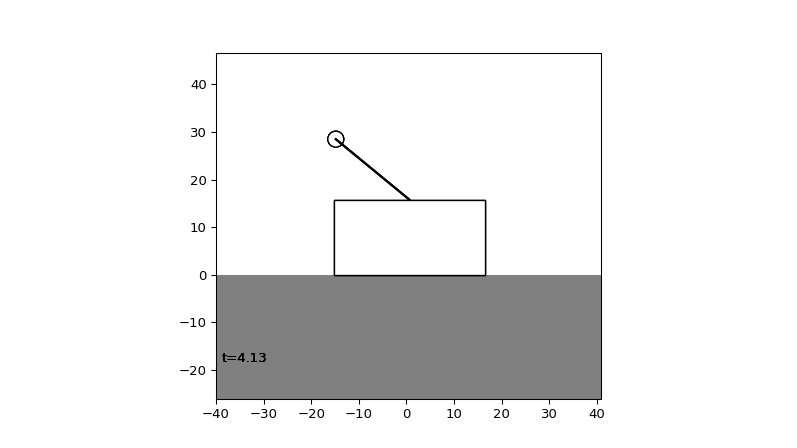

In [26]:
ani = visu.animate()

We can animate the figure by calling the `Visualizer`'s `animate` function. Importantly, we must bind the result of that function to a variable, `ani`, because the animation plays as long as that variable exists. If we just call `visu.animate()` without storing the result in a varialbe, the animation will only exist long enough to be created and then immediately destroyed. 

So, just bind your animations to variables.

In order to display properly in notebooks, it sometimes may be necessarily to convert the generated animation to an HTML5 video:

In [27]:
from IPython.display import HTML
HTML(ani.to_html5_video())